In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False): 
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    cs = plot_contours(ax, clf, xx, yy, cmap='rainbow', alpha=0.8)

    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap='rainbow', s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap='rainbow', s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap='rainbow', s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
    if show:
        plt.show()
    else:
        return ax

# `sklearn` Breast Cancer Dataset

In [41]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
breast = datasets.load_breast_cancer(as_frame=True)
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
# we will only use these features
X = breast['data'][['mean radius', 'mean concave points']]
y = breast['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    stratify=y)

In [34]:
X_train.shape

(455, 2)

In [35]:
X_test.shape

(114, 2)

## Decision Tree Classifier

In [38]:
# initiate tree classifier
dt = DecisionTreeClassifier(max_depth=6,
                            random_state=1)

In [39]:
# fit to training
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [40]:
# predict test
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 1 1 0]


In [42]:
# compute test accuracy
acc = accuracy_score(y_pred, y_test)
print(f'Test acc: {acc: .2f}')

Test acc:  0.89


## Logistic Regression vs Classification Tree

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# initiate regressor and fit
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

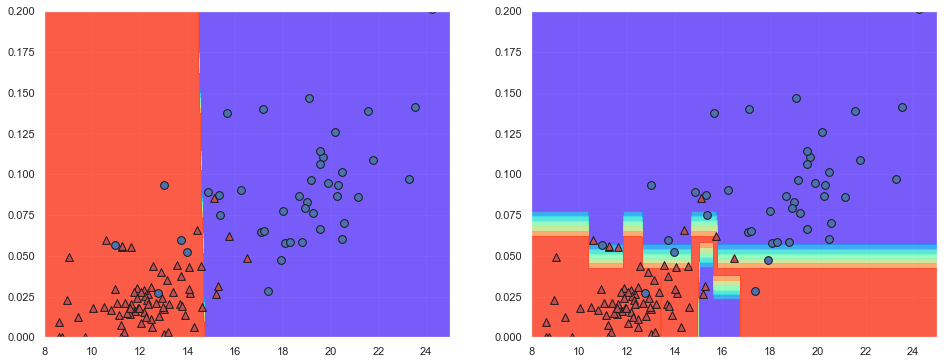

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

plot_classifier(X_test.to_numpy(), y_test.to_numpy(), lr, ax=ax1)
plot_classifier(X_test.to_numpy(), y_test.to_numpy(), dt, ax=ax2)

ax1.set_ylim(0, 0.2)
ax1.set_xlim(8, 25)
ax2.set_ylim(0, 0.2)
ax2.set_xlim(8, 25)

plt.show()

In contrast to LogReg, Classification tree divides the feature space into rectangular regions.

## Using different criterions for tree classifiers

In [55]:
X = breast['data']
y = breast['target']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [57]:
X_train.shape

(455, 30)

In [58]:
X_test.shape

(114, 30)

In [61]:
# initiate dt models
dt_ent = DecisionTreeClassifier(criterion='entropy',
                                max_depth=8,
                                random_state=1)
dt_gini = DecisionTreeClassifier(criterion='gini',
                                max_depth=8,
                                random_state=1)

In [62]:
# fit
dt_ent.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [63]:
# get test preds
ent_preds = dt_ent.predict(X_test)
gini_preds = dt_gini.predict(X_test)

In [64]:
# get accuracies
print(f'Ent acc: {accuracy_score(y_test, ent_preds)}')
print(f'Gini acc: {accuracy_score(y_test, gini_preds)}')

Ent acc: 0.9649122807017544
Gini acc: 0.9649122807017544


# [Auto-mpg](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset

In [65]:
auto = pd.read_csv('./auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [66]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [72]:
X = auto.drop('mpg', axis=1)
y = auto['mpg']

In [73]:
# not quite sure whether to drop_first since this is
# a tree classifier
X = pd.get_dummies(X, columns=['origin'], drop_first=False)
X.head()

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [74]:
X.shape

(392, 8)

In [75]:
y.shape

(392,)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=3)

In [77]:
X_train.shape

(313, 8)

In [78]:
X_test.shape

(79, 8)

## Regression Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [80]:
# initiate regression tree
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

In [81]:
# fit
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [83]:
# compute test preds
y_pred = dt.predict(X_test)

In [84]:
# compute rmse
rmse_dt = np.sqrt(mse(y_pred, y_test))
print(f'Test acc: {rmse_dt: .2f}')

Test acc:  4.37


now, we compare this with the RMSE achieved from a linear regression

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
# compute rmse
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mse(y_test, y_pred_lr))
print(f'Test acc: {rmse_lr: .2f}')

Test acc:  5.10
